In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
from sklearn import manifold,datasets
import time
import matplotlib.pyplot as plt
from scipy import stats,spatial
import seaborn as sns

In [2]:
import warnings
from numba.core.errors import NumbaDeprecationWarning
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
np.random.seed(42)
X, t = datasets.make_swiss_roll(2000,)
X[:, 1] *= 3
ground_truth = np.stack([X[:, 1], t], axis=1)

In [4]:
ad = sc.AnnData(X=X)
ad.obs['t'] = t

In [5]:
sc.pp.neighbors(ad, 10)
sc.tl.diffmap(ad, 10)

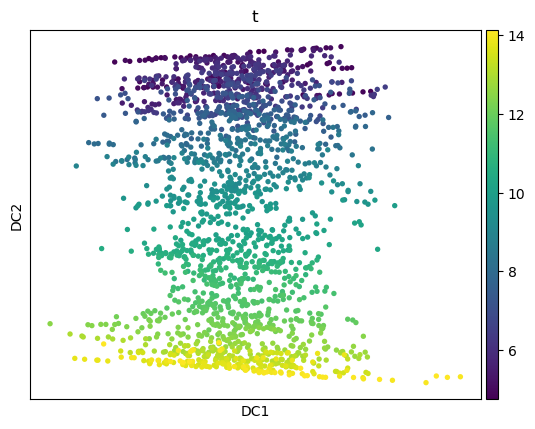

In [6]:
sc.pl.diffmap(ad,color=['t'])

In [7]:
X_diffmap = ad.obsm['X_diffmap']

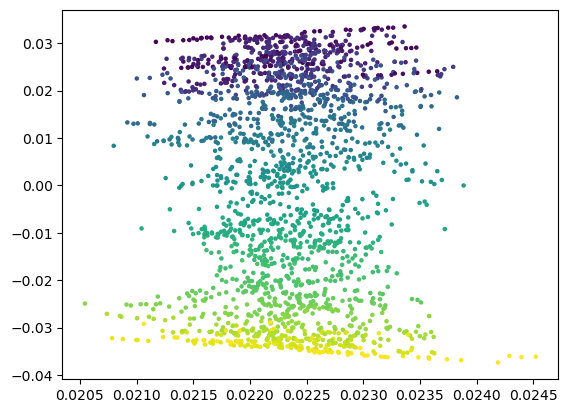

In [8]:
plt.scatter(X_diffmap[:, 0],X_diffmap[:,1], c=t,s =5, cmap = "viridis")

In [9]:
np.savetxt("swiss_Y_dm.csv",X_diffmap[:,[0,1]],delimiter=',')

In [10]:
def correlation(matrix_A, matrix_B):
    
    from scipy import stats
    n_samples = matrix_A.shape[0]
    pearsonr_correlation_list = []
    spearmanr_correlation_list = []
    for i in range(n_samples):
        pearsonr_res = stats.pearsonr(matrix_A[i], matrix_B[i])
        pearsonr_correlation_list.append(pearsonr_res.statistic) 
        spearmanr_res = stats.spearmanr(matrix_A[i], matrix_B[i])
        spearmanr_correlation_list.append(spearmanr_res.statistic)
        
    pearsonr_correlation_mean = np.mean(pearsonr_correlation_list)
    spearmanr_correlation_mean = np.mean(spearmanr_correlation_list)
    pearsonr_correlation_interval = stats.norm.interval(confidence=0.95, loc=pearsonr_correlation_mean, scale=stats.sem(pearsonr_correlation_list))
    spearmanr_correlation_interval = stats.norm.interval(confidence=0.95, loc=spearmanr_correlation_mean, scale=stats.sem(spearmanr_correlation_list))
    
    correlation_mean = [pearsonr_correlation_mean,spearmanr_correlation_mean]
    correlation_interval = [pearsonr_correlation_interval,spearmanr_correlation_interval]
    
    pearsonr_correlation = [pearsonr_correlation_mean,pearsonr_correlation_interval]
    spearmanr_correlation = [spearmanr_correlation_mean,spearmanr_correlation_interval]
    
    return pearsonr_correlation_list,spearmanr_correlation_list,pearsonr_correlation,spearmanr_correlation 

In [11]:
X_dists = spatial.distance.squareform(spatial.distance.pdist(ground_truth,metric = 'euclidean'))
Y_dists = spatial.distance.squareform(spatial.distance.pdist(X_diffmap,metric = 'euclidean'))

In [12]:
corr = correlation(X_dists,Y_dists)
corr[2:]

([0.49347225287434326, (0.4898585930240579, 0.49708591272462865)],
 [0.4579558581194645, (0.4523505896181804, 0.46356112662074855)])

In [13]:
tti = manifold.trustworthiness(Y_dists,ground_truth,n_neighbors=50)
tti

0.9472365913224214